In [3]:
import numpy as np
import pandas as pd
import sklearn_evaluation
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC


In [4]:

X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()


In [23]:
def cross_validate_gradient(
        n_estimators,
        learning_rates,
        max_depths
):
    parameters = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rates,
        'max_depth': max_depths,
    }
    classifier = GradientBoostingClassifier(
        random_state=0,
    )
    grid_search = GridSearchCV(
        classifier,
        parameters, cv=4,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)

    print_grid_search_results(grid_search, parameters)
    return grid_search


def print_grid_search_results(grid_search, parameters):
    for parameter in parameters:
        print(f'Best {parameter}:', grid_search.best_params_[parameter])
    print("Train score: ", grid_search.cv_results_['mean_train_score'])
    print("Test score: ", grid_search.cv_results_['mean_test_score'])



def graph_grid_search_random_forest(grid_search):
    plt.title("GBRT")
    plt.xlabel("max_depth")
    plt.ylabel("n_estimators")

    sklearn_evaluation.evaluator.plot.grid_search(
        grid_search.cv_results_,
        change=[ "n_estimators", "max_depth"]
    )

    plt.legend()
    plt.show()


In [6]:
n_estimators = [50, 100, 200]
max_depths = [1, 2, 3]
learning_rates = [0.01]

gbrt_t1 = cross_validate_gradient( n_estimators, learning_rates, max_depths )

Best n_estimators: 200
Best learning_rate: 0.01
Best max_depth: 3
Train score:  [0.48600902 0.56056573 0.64732426 0.63173814 0.7081699  0.82084329
 0.73746356 0.82816734 0.91680768]
Test score:  [0.43493889 0.48732663 0.57352866 0.53353085 0.58593003 0.68451945
 0.58875297 0.66761739 0.73804349]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


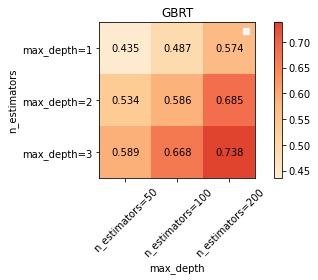

In [18]:
graph_grid_search_random_forest(gbrt_t1)

In [7]:
n_estimators = [200, 300, 500]
max_depths = [1, 3, 5]
learning_rates = [0.01, 0.1]

gbrt_t2 = cross_validate_gradient( n_estimators, learning_rates, max_depths )

Best n_estimators: 500
Best learning_rate: 0.1
Best max_depth: 1
Train score:  [0.64732426 0.70572784 0.79136081 0.91680768 0.9568073  0.98366229
 0.98497652 0.99079823 0.99342726 0.95079748 0.97276963 0.98610307
 0.99380292 0.99380292 0.99380292 0.99380292 0.99380292 0.99380292]
Test score:  [0.57352866 0.6270527  0.69747499 0.73804349 0.78649488 0.81409259
 0.75944878 0.77916743 0.80113197 0.83493736 0.84901902 0.86141531
 0.85069677 0.85689555 0.85238978 0.83943806 0.84112216 0.84900631]


In [21]:
n_estimators = [200, 300, 500]
max_depths = [1, 3, 5]
learning_rates = [0.1]

gbrt_t3 = cross_validate_gradient( n_estimators, learning_rates, max_depths )


Best n_estimators: 500
Best learning_rate: 0.1
Best max_depth: 1
Train score:  [0.95079748 0.97276963 0.98610307 0.99380292 0.99380292 0.99380292
 0.99380292 0.99380292 0.99380292]
Test score:  [0.83493736 0.84901902 0.86141531 0.85069677 0.85689555 0.85238978
 0.83943806 0.84112216 0.84900631]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


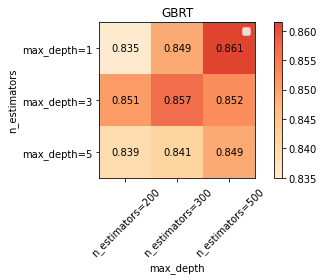

In [24]:
graph_grid_search_random_forest(gbrt_t3)

In [10]:
print("Train score: {:3f}".format(gbrt_t2.score(X_train, y_train)))
print("Test score: {:3f}".format(gbrt_t2.score(X_test, y_test)))

Train score: 0.981972
Test score: 0.887387
